In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path ='C:/Users/palki/Downloads/archive (5)/WorldsBestRestaurants.csv'
data = pd.read_csv(file_path)

# Prepare the data for classification
# Features: lat and lng (geographical data)
X = data[['lat', 'lng']]

# Target: country (we'll classify based on country)
y = data['country']

# Encode the target variable (country) into numerical format for the model
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=5)
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the models
knn.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)

In [6]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Generate confusion matrices
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Recompute the labels only from the test set predictions to avoid the mismatch
unique_labels_test = sorted(set(y_test))

In [7]:
report_knn = classification_report(y_test, y_pred_knn, labels=unique_labels_test, target_names=label_encoder.inverse_transform(unique_labels_test))
report_tree = classification_report(y_test, y_pred_tree, labels=unique_labels_test, target_names=label_encoder.inverse_transform(unique_labels_test))

# Display results
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")
print(f"Decision Tree Accuracy: {accuracy_tree * 100:.2f}%")
print("\nClassification Report for KNN:\n", report_knn)
print("\nClassification Report for Decision Tree:\n", report_tree)

KNN Accuracy: 95.24%
Decision Tree Accuracy: 98.10%

Classification Report for KNN:
                       precision    recall  f1-score   support

           Argentina       1.00      0.50      0.67         2
           Australia       1.00      1.00      1.00        11
             Austria       0.86      1.00      0.92         6
             Belgium       1.00      0.88      0.93         8
              Brazil       1.00      1.00      1.00         2
              Canada       0.00      0.00      0.00         1
               Chile       0.75      1.00      0.86         3
               China       1.00      1.00      1.00         3
            Colombia       1.00      1.00      1.00         1
             Denmark       1.00      1.00      1.00         8
              France       1.00      0.90      0.95        40
             Germany       0.75      0.82      0.78        11
           Hong Kong       1.00      1.00      1.00         8
               India       1.00      1.00     

C:\Users\palki\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\palki\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\palki\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


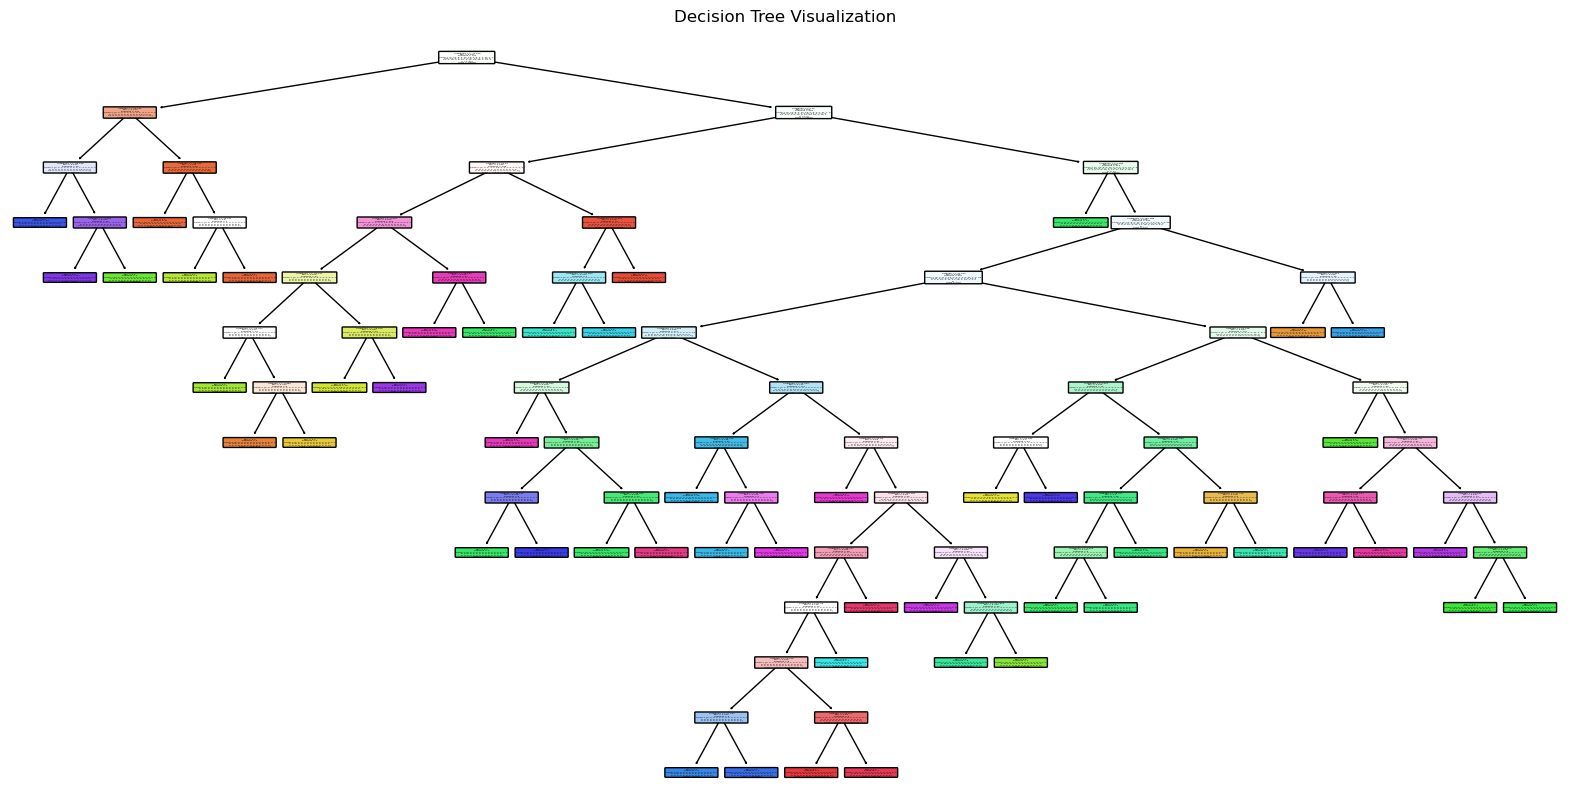

In [8]:
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=['Latitude', 'Longitude'], class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

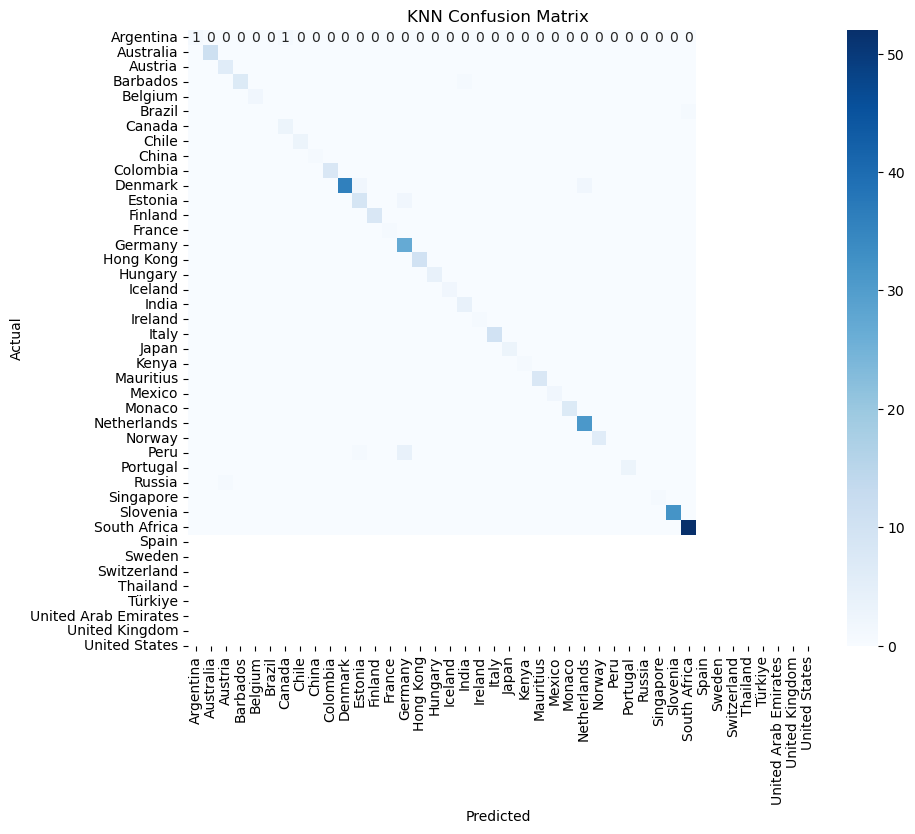

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

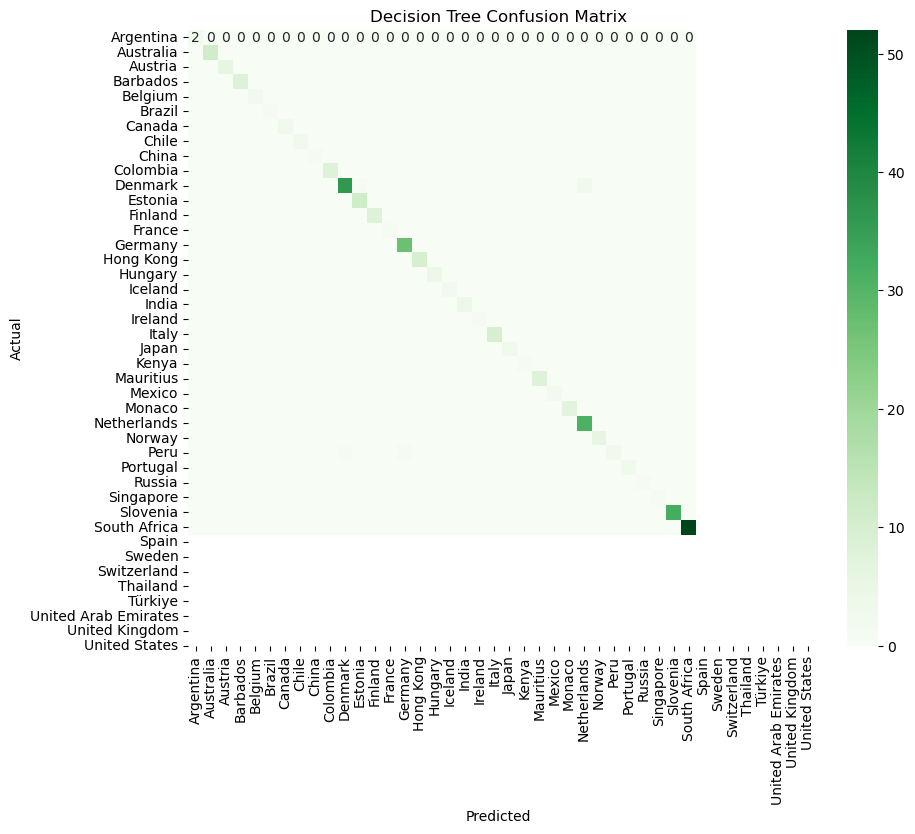

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


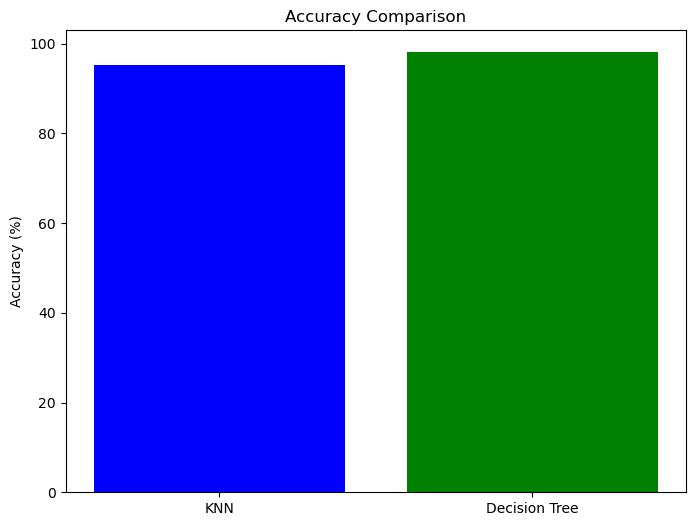

In [11]:
plt.figure(figsize=(8, 6))
models = ['KNN', 'Decision Tree']
accuracy_scores = [accuracy_knn * 100, accuracy_tree * 100]
plt.bar(models, accuracy_scores, color=['blue', 'green'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.show()